# **Importing Required Libraries**

In [1]:
pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5568 sha256=0a9cf0effaee8db5149869adf7ea63eff08354fa2cb7df73a99c6f2e540c65b1
  Stored in directory: /root/.cache/pip/wheels/cd/ef/ae/073b491b14d25e2efafcffca9e16b2ee6d114ec5c643ba4f06
Successfully built word2number


In [2]:
import pandas as pd
import numpy as np
import re
from dateutil import parser
from word2number import w2n
import matplotlib.pyplot as plt
import seaborn as sns

# **Load the Dataset**

In [3]:
df = pd.read_csv('/content/Fitness_Tracker_Uncleaned_500_Rows.csv', dtype=str, skip_blank_lines=True)

In [4]:
df.head()

,Date,Steps,Calories,SleepHours,ActivityType
0,2025/07/15,NaN,549,6.5,Cycling
1,NaN,10338,NaN,7,walking
2,2025-04-01,NaN,NaN,seven,Running
3,2025/06/10,NaN,NaN,NaN,run
4,29-04-2025,NaN,NaN,8,Running


In [5]:
df.sample(n=5)

,Date,Steps,Calories,SleepHours,ActivityType
483,2025/10/26,7528,NaN,6.5,Yoga
335,NaN,NaN,559,7,Yoga
186,04/02/2025,5938,530,8,Yoga
157,NaN,"1,345",NaN,six,Yoga
278,24/02/2025,NaN,NaN,7,GYM


In [6]:
df.shape

(500, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          396 non-null    object
 1   Steps         246 non-null    object
 2   Calories      177 non-null    object
 3   SleepHours    448 non-null    object
 4   ActivityType  500 non-null    object
dtypes: object(5)
memory usage: 19.7+ KB


In [8]:
df.describe()

,Date,Steps,Calories,SleepHours,ActivityType
count,396,246,177,448,500
unique,342,245,141,9,8
top,2025/09/10,8611,440,7.2,Running
freq,3,2,3,56,87


In [9]:
df.isnull().sum()

,0
Date,104
Steps,254
Calories,323
SleepHours,52
ActivityType,0


# **Clean the 'Date' Column**

In [10]:
df_clean = df.copy()

def safe_parse_date(x):
    try:
        return parser.parse(str(x), dayfirst=True)
    except:
        return pd.NaT

df_clean['Date'] = df_clean['Date'].apply(safe_parse_date)


# **Clean the 'Steps' Column**

In [11]:
def parse_steps(x):
    if pd.isna(x):
        return np.nan
    try:
        return int(re.sub(r'[^\d]', '', str(x)))
    except:
        return np.nan

df_clean['Steps'] = df_clean['Steps'].apply(parse_steps)

# **Clean the 'Calories' Column**

In [12]:
def convert_calories(x):
    try:
        return float(re.search(r'\d+', str(x)).group())
    except:
        try:
            return w2n.word_to_num(str(x).lower())
        except:
            return np.nan

df_clean['Calories'] = df_clean['Calories'].apply(convert_calories)

# **Clean the 'SleepHours' Column**

In [13]:
def convert_sleep(x):
    try:
        return float(x)
    except:
        try:
            return w2n.word_to_num(str(x).lower())
        except:
            return np.nan

df_clean['SleepHours'] = df_clean['SleepHours'].apply(convert_sleep)

# **Clean and Standardize 'ActivityType' Column**

In [14]:
df_clean['ActivityType'] = df_clean['ActivityType'].astype(str).str.strip().str.lower()

df_clean['ActivityType'] = df_clean['ActivityType'].replace({
    r'^(walk|walking)$':'Walking',
    r'^(run|running)$':'Running',
    r'^(cycle|cycling)$':'Cycling',
    r'^gym$':'Gym',
    r'^yoga$':'Yoga'
}, regex=True)

# **Handle Missing Values**

In [15]:
print(df_clean.isnull().sum())

df_clean = df_clean.dropna(subset=['Date', 'ActivityType'])

df_clean.loc[:,'Steps'] = df_clean['Steps'].fillna(df_clean['Steps'].mean())
df_clean.loc[:,'Calories'] = df_clean['Calories'].fillna(df_clean['Calories'].mean())
df_clean.loc[:,'SleepHours'] = df_clean['SleepHours'].fillna(df_clean['SleepHours'].mean())


print("\nMissing values after handling:")
print(df_clean.isnull().sum())

df_clean.sample(5)

Date            104
Steps           254
Calories        323
SleepHours       52
ActivityType      0
dtype: int64

Missing values after handling:
Date            0
Steps           0
Calories        0
SleepHours      0
ActivityType    0
dtype: int64


,Date,Steps,Calories,SleepHours,ActivityType
497,2025-08-10,10098.000000,405.478571,7.200000,Running
268,2025-04-17,6097.933673,405.478571,6.844602,Running
30,2025-11-08,4631.000000,235.000000,7.200000,Running
301,2025-07-23,6097.933673,405.478571,7.200000,Gym
364,2025-03-13,6097.933673,405.478571,8.000000,Yoga


# **weekly fitness metrics like steps, calories, and sleep**

In [18]:
df_weekly = df_clean.copy()
df_weekly['Week'] = df_weekly['Date'].dt.to_period('W').dt.start_time


In [19]:
weekly_metrics = df_weekly.groupby('Week')[['Steps', 'Calories', 'SleepHours']].mean().reset_index()


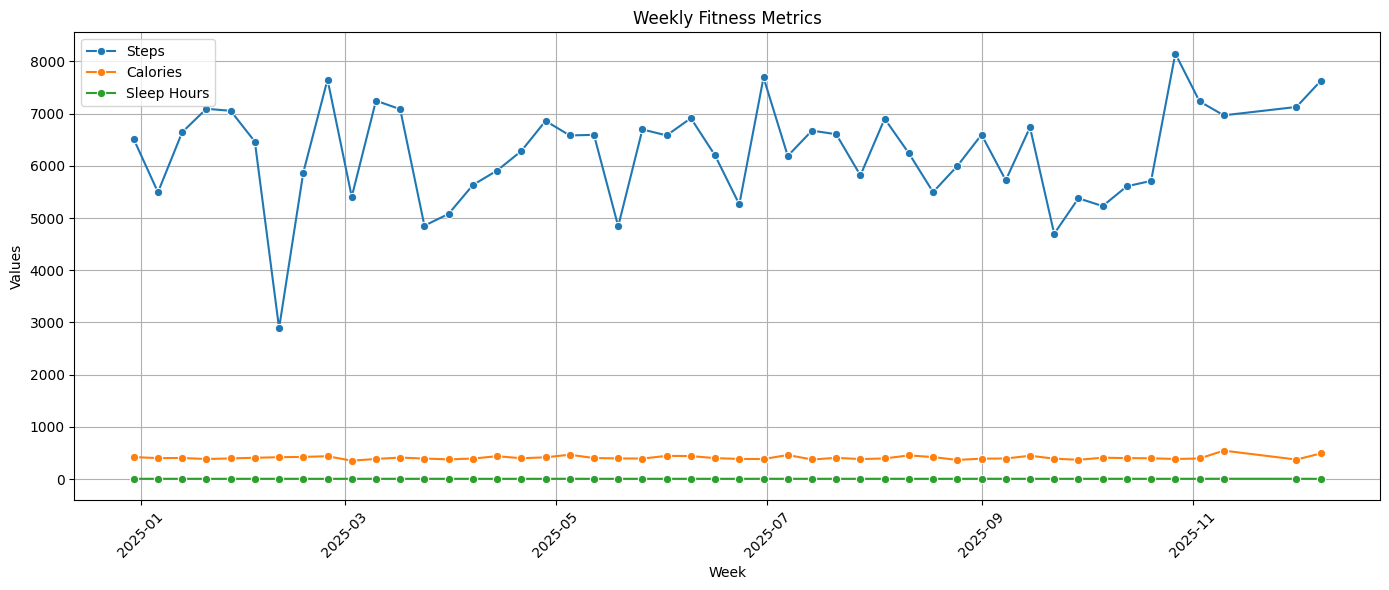

In [20]:
plt.figure(figsize=(14, 6))

sns.lineplot(data=weekly_metrics, x='Week', y='Steps', marker='o', label='Steps')
sns.lineplot(data=weekly_metrics, x='Week', y='Calories', marker='o', label='Calories')
sns.lineplot(data=weekly_metrics, x='Week', y='SleepHours', marker='o', label='Sleep Hours')

plt.title('Weekly Fitness Metrics')
plt.xlabel('Week')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# **Line Chart – Steps Over Time**

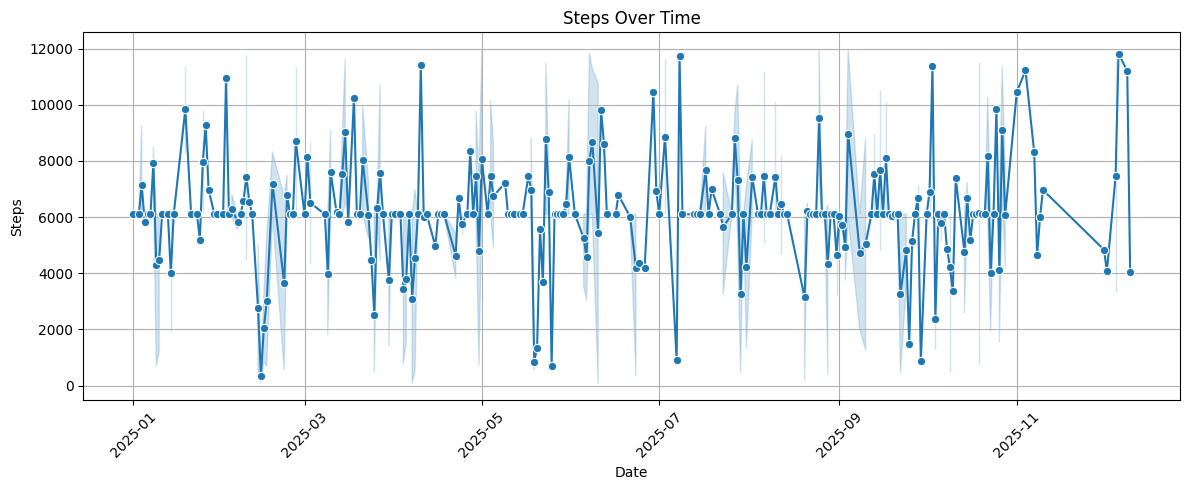

In [21]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_clean, x='Date', y='Steps', marker='o')
plt.title('Steps Over Time')
plt.xlabel('Date')
plt.ylabel('Steps')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()


# **Bar Chart – Calories Burned Per Day**

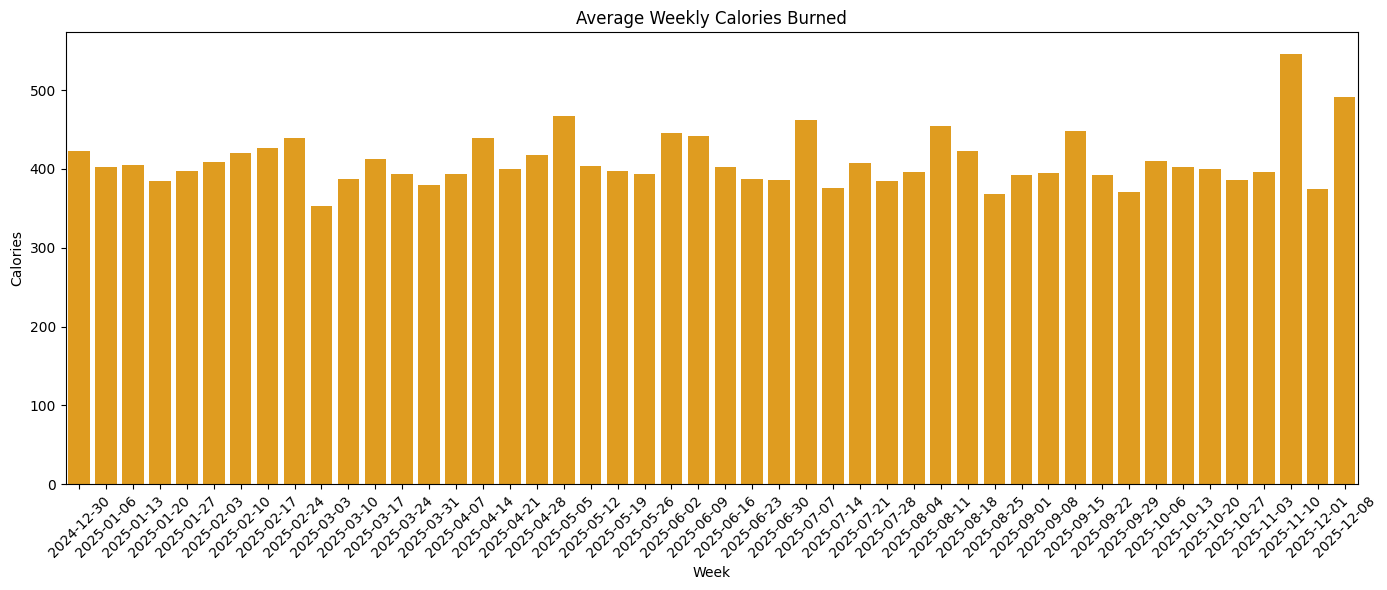

In [22]:
df_bar = df_clean.copy()
df_bar['Week'] = df_bar['Date'].dt.to_period('W').dt.start_time

# Group by week and calculate average or total calories
weekly_calories = df_bar.groupby('Week')['Calories'].mean().reset_index()

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(data=weekly_calories, x='Week', y='Calories', color='orange')
plt.title('Average Weekly Calories Burned')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Pie Chart – Activity Type Distribution (Still with Matplotlib)**

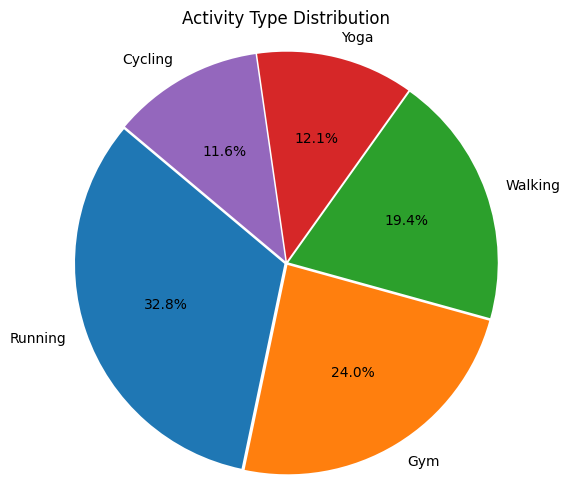

In [23]:



activity_counts = df_clean['ActivityType'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(activity_counts, labels=activity_counts.index, autopct='%1.1f%%', startangle=140, explode = [0.01] * len(activity_counts))
plt.title('Activity Type Distribution')
plt.axis('equal')
plt.show()

# **Heatmap: Correlation Between Features**

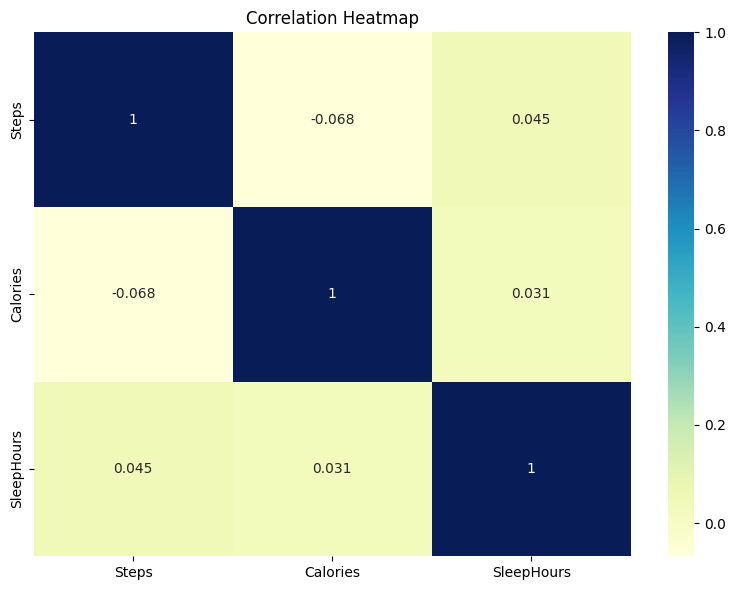

In [17]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_clean[['Steps', 'Calories', 'SleepHours']].corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()